# Credit Card Fraud Detection Prediction

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#Importing the dataset
credict=pd.read_csv("creditcard.csv")

In [3]:
#Top 5 Rows
credict.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#last 5 rows
credict.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#Dataset Info
credict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Checking the number of missing values in each column
credict.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Distribution of legit transaction & Fradulant transactions
credict['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

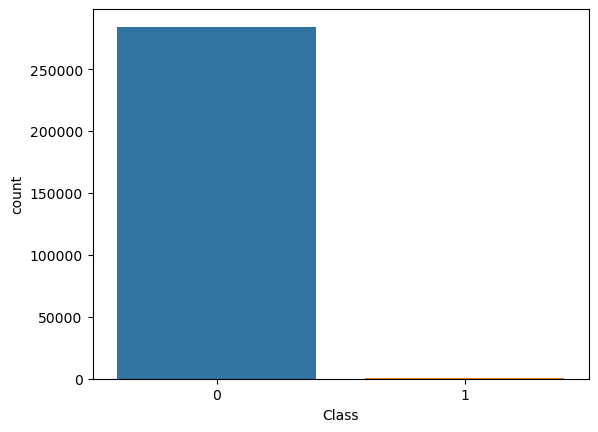

In [10]:
sns.countplot(data=credict,x="Class")

In [ ]:
# This dataset is highly unbalanced

0--> Normal Transaction
1--> fradulant Transaction

In [11]:
#Separating the data for analysis
legit=credict[credict['Class']==0]
fraud=credict[credict['Class']==1]

In [12]:
print(legit.shape)

(284315, 31)


In [13]:
print(fraud.shape)

(492, 31)


In [14]:
#Statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
#Compare the values for both transactions
credict.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# under sampling

In [17]:
#Build a sample dataset containing similar distribution and fradulant transaction

In [19]:
#Number of fradulant transaction --->492

In [20]:
legit_sample=legit.sample(n=492)

In [21]:
#Concatenating two dataframes

new_data=pd.concat([legit_sample,fraud],axis=0)

In [22]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
62834,50451.0,1.258653,0.032949,-1.321230,-0.042592,2.236631,3.299036,-0.332208,0.758832,-0.155840,...,-0.012536,-0.187026,-0.153900,1.005103,0.840000,-0.315118,0.012261,0.017274,25.65,0
236207,148711.0,2.238413,-0.319052,-2.043172,-0.823463,0.227952,-0.969528,-0.088634,-0.396281,-0.734299,...,-0.048903,-0.060552,0.151157,0.416092,0.095511,-0.300617,-0.021749,-0.028637,15.00,0
59580,48906.0,0.973032,-0.347965,1.286990,1.684915,-0.856348,0.788646,-0.657284,0.460148,1.107588,...,-0.345136,-0.653367,0.085062,0.196225,0.329256,-0.538955,0.077369,0.023021,35.80,0
210335,137934.0,-15.168474,-19.190285,-1.749319,2.999120,8.141815,-4.746811,-5.319852,0.394059,0.198056,...,-0.332482,-2.027769,-5.041949,-0.983799,-1.076277,-0.460614,2.756117,-4.639338,814.25,0
20554,31117.0,-1.902572,-4.806674,-1.268617,2.163626,-1.537530,0.944054,1.860075,-0.132351,-0.320973,...,0.971960,-0.694318,-1.318257,-0.227683,-0.252264,-0.587221,-0.242231,0.279749,1558.26,0


In [23]:
#Check the value counts
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [24]:
new_data.shape

(984, 31)

In [25]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98756.012195,-0.009735,-0.023826,0.018784,-0.036874,0.046838,-0.073942,-0.020222,-0.022266,0.019203,...,-0.020034,0.044315,0.004686,0.011050,-0.052252,-0.006961,-0.028128,-0.015280,-0.030998,78.123720
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [26]:
#Splitting the data into features and targets

x=new_data.drop(columns='Class',axis=1)
y=new_data['Class']

In [27]:
print(x)

            Time         V1         V2        V3        V4        V5  \
62834    50451.0   1.258653   0.032949 -1.321230 -0.042592  2.236631   
236207  148711.0   2.238413  -0.319052 -2.043172 -0.823463  0.227952   
59580    48906.0   0.973032  -0.347965  1.286990  1.684915 -0.856348   
210335  137934.0 -15.168474 -19.190285 -1.749319  2.999120  8.141815   
20554    31117.0  -1.902572  -4.806674 -1.268617  2.163626 -1.537530   
...          ...        ...        ...       ...       ...       ...   
279863  169142.0  -1.927883   1.125653 -4.518331  1.749293 -1.566487   
280143  169347.0   1.378559   1.289381 -5.004247  1.411850  0.442581   
280149  169351.0  -0.676143   1.126366 -2.213700  0.468308 -1.120541   
281144  169966.0  -3.113832   0.585864 -5.399730  1.817092 -0.840618   
281674  170348.0   1.991976   0.158476 -2.583441  0.408670  1.151147   

              V6        V7        V8        V9  ...       V20       V21  \
62834   3.299036 -0.332208  0.758832 -0.155840  ...  0.02489

In [28]:
print(y)

62834     0
236207    0
59580     0
210335    0
20554     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [29]:
#spliting the data into training data and testing data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [30]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


In [31]:
print(y.shape,y_train.shape,y_test.shape)

(984,) (787,) (197,)


# Model Training

# Logistic Regression

In [32]:
model=LogisticRegression()

In [33]:
#training the Logistic Regression model with training data
model.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation

# Accuracy Score

In [34]:
#accuracy on Training data

x_train_pred=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_pred,y_train)

In [35]:
print("Accuracy on Training data :",training_data_accuracy)

Accuracy on Training data : 0.9237611181702668


In [36]:
#Accuracy on Testing data
y_pred=model.predict(x_test)
y_pred_accuracy=accuracy_score(y_pred,y_test)

In [39]:
print("Accuracy on Testing data :",y_pred_accuracy)

Accuracy on Testing data : 0.9035532994923858
